Predicting the Class Iris Species Using Decision Tree

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [31]:
iris.shape

(150, 6)

In [32]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [33]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
#count the Numeber of Species
iris['Species'].value_counts()  

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [36]:
iris = iris.drop('Id', axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


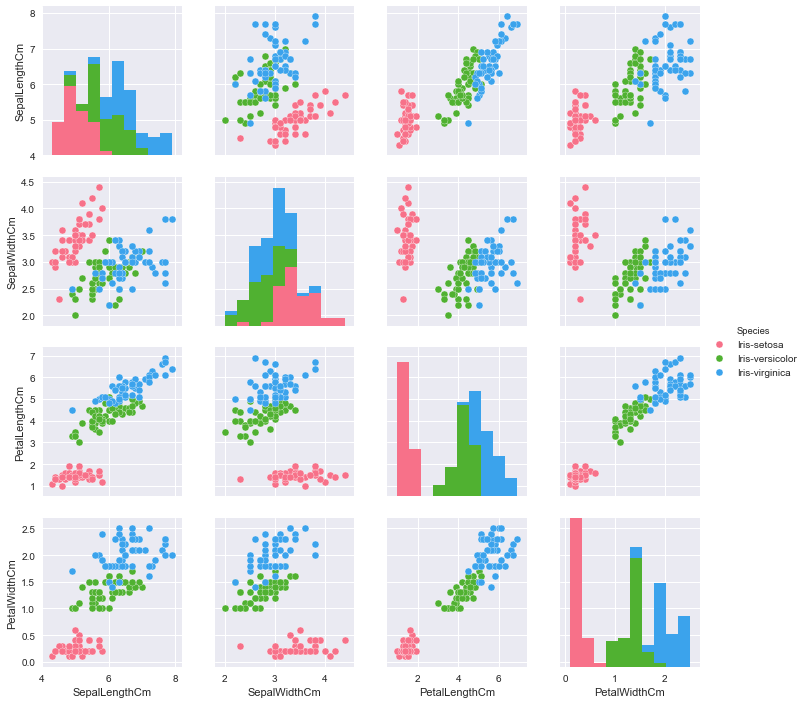

In [37]:
plot= sns.pairplot(iris, hue="Species", palette="husl")
plt.show()

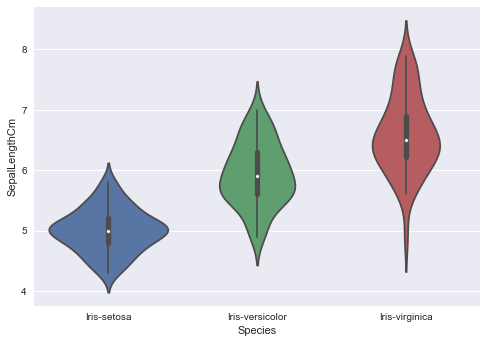

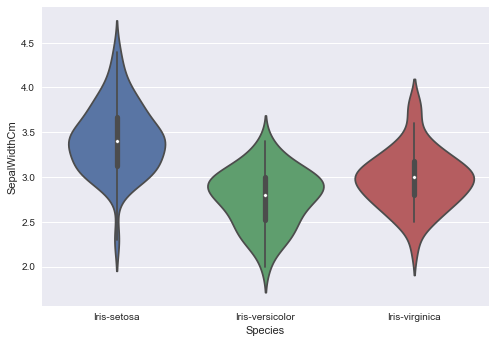

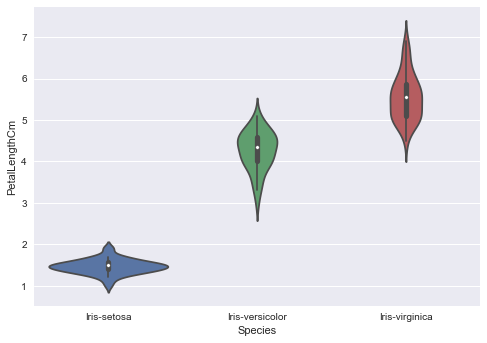

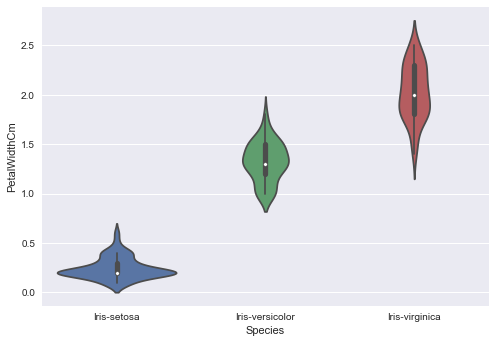

In [38]:
sns.violinplot(x = iris['Species'] ,y = iris['SepalLengthCm'] )
plt.show()
sns.violinplot(x = iris['Species'] ,y = iris['SepalWidthCm'] )
plt.show()
sns.violinplot(x = iris['Species'] ,y = iris['PetalLengthCm'] )
plt.show()
sns.violinplot(x = iris['Species'] ,y = iris['PetalWidthCm'] )
plt.show()

In [39]:
X = iris.iloc[: , :-1].values
y = iris.iloc[: , -1].values

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [53]:
#Splitting the data into trainning and test set
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.25, random_state = 42)
print("Data Splitted")

Data Splitted


In [42]:
#Train Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [43]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]]


In [44]:
from sklearn.metrics import accuracy_score ,confusion_matrix
print('Confusion Matrix is : \n',confusion_matrix(y_test , y_pred))
print('Accuracy Score is :',accuracy_score(y_test , y_pred))

Confusion Matrix is : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy Score is : 1.0


Import the Required Library and Install it

In [45]:
!pip install pydotplus
!apt-get install graphviz -y

You are using pip version 9.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [48]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Visualize the graph

In [47]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names= iris.columns[:-1] ,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found